<>:38: SyntaxWarning: invalid escape sequence '\d'
<>:38: SyntaxWarning: invalid escape sequence '\d'
/var/folders/x0/9dpvqwcj6f3915c0b102q0bc0000gn/T/ipykernel_19567/3832815606.py:38: SyntaxWarning: invalid escape sequence '\d'
  plt.title("s* vs. $\delta/N_0$")


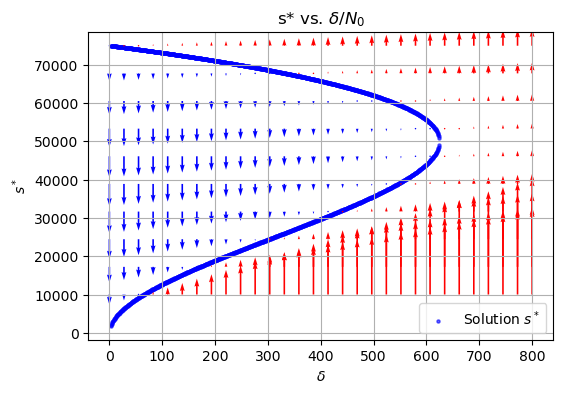

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root

def equation(s, alpha, beta, d, gamma=0):
    return alpha * s**2 + beta * s + d / (s + 1e-5) + gamma

alpha = 4e-7
beta = -3e-2
gamma = 0
d_values = np.linspace(1e5, 3.2e7, 1000)  # d 
s0 = [4e4]
s_solutions = []
x_values = []

for d in d_values:
    try:
        initial_guesses = [1, 9e4]
        for x0 in initial_guesses:
            result = root(equation, x0=x0, args=(alpha, beta, d, gamma), method='hybr')
            if result.success:
                real_root = result.x[0]
                if real_root > 0 and abs(equation(real_root, alpha, beta, d, gamma)) < 1e-6:
                    s_solutions.append(real_root)
                    x_values.append(d/s0)
    except RuntimeError:
        print(f"Failed to converge for d = {d}")
s_q, d_q = np.mgrid[10000:max(s_solutions):10j, 1e-7:max(d_values):30j]
u = np.zeros_like(s_q)
v = alpha * s_q**2 + beta * s_q +  d_q / (s_q + 1e-5) + gamma
C = np.where(v < 0, 0, 1) 

plt.figure(figsize=(6, 4))
plt.scatter(x_values, s_solutions, color='b', label='Solution $s^*$', alpha=0.6, s=5)
plt.quiver(d_q/s0, s_q, u, v, C, cmap='bwr')
plt.xlabel(r"$\delta$")
plt.ylabel(r"$s^*$")
plt.title("s* vs. $\delta/N_0$")
plt.legend()
plt.grid()
plt.show()